In [1]:
# Instalamos la lib
!git clone https://github.com/elsonidoq/ml-practico-2022.git 

Cloning into 'ml-practico-2022'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 318 (delta 0), reused 2 (delta 0), pack-reused 313
Receiving objects: 100% (318/318), 4.24 MiB | 22.95 MiB/s, done.
Resolving deltas: 100% (191/191), done.


In [21]:
!cd ml-practico-2022; git pull

remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 5 (delta 4), reused 5 (delta 4), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/elsonidoq/ml-practico-2022
   aa57249..90909ac  main       -> origin/main
Updating aa57249..90909ac
Fast-forward
 lib/taller_model_selection/evaluate.py | 1 -
 1 file changed, 1 deletion(-)


In [3]:
import sys
sys.path.append('ml-practico-2022/lib')

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
from taller_model_selection.serialize import iter_jl

X_train = list(iter_jl('/content/gdrive/MyDrive/taller-model-selection-data/X_train.jl'))
y_train = list(iter_jl('/content/gdrive/MyDrive/taller-model-selection-data/y_train.jl'))

In [6]:
import pandas as pd

df = pd.DataFrame(X_train)
df['price'] = y_train

# Inspeccionamos algunos ejemplos

In [8]:
df.iloc[10]

id                                          U3qdJMKXnOJm0Y1tWpnnfg==
ad_type                                                    Propiedad
start_date                                                2020-08-22
end_date                                                  2020-09-04
created_on                                                2020-08-22
lat                                                       -34.597364
lon                                                       -58.372987
l1                                                         Argentina
l2                                                   Capital Federal
l3                                                            Retiro
l4                                                               NaN
l5                                                               NaN
l6                                                               NaN
rooms                                                            NaN
bedrooms                          

In [9]:
df.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'currency', 'price_period', 'title',
       'description', 'property_type', 'operation_type', 'price'],
      dtype='object')

In [10]:
df.describe()

,lat,lon,l5,l6,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,150736.000000,150736.000000,0.0,0.0,138238.000000,117506.000000,139448.000000,107292.000000,105771.000000,1.610200e+05
mean,-34.591660,-58.458251,NaN,NaN,2.693355,1.961032,1.585444,162.528679,143.550784,2.796378e+05
std,0.338192,0.488610,NaN,NaN,1.511358,1.883281,0.957702,1280.597439,3243.060681,4.503929e+05
min,-53.788624,-100.469651,NaN,NaN,1.000000,-2.000000,1.000000,10.000000,1.000000,1.000100e+04
25%,-34.615577,-58.464261,NaN,NaN,2.000000,1.000000,1.000000,45.000000,41.000000,1.000000e+05
50%,-34.596826,-58.439307,NaN,NaN,3.000000,2.000000,1.000000,70.000000,60.000000,1.600000e+05
75%,-34.577053,-58.408234,NaN,NaN,3.000000,3.000000,2.000000,125.000000,102.000000,2.850000e+05
max,26.217375,-5.490771,NaN,NaN,40.000000,153.000000,20.000000,140380.000000,950000.000000,9.999999e+06


In [11]:
# Nans en cada columna
df.isna().sum(0) / len(df)

id                 0.000000
ad_type            0.000000
start_date         0.000000
end_date           0.000000
created_on         0.000000
lat                0.063868
lon                0.063868
l1                 0.000000
l2                 0.000000
l3                 0.008688
l4                 0.960924
l5                 1.000000
l6                 1.000000
rooms              0.141486
bedrooms           0.270240
bathrooms          0.133971
surface_total      0.333673
surface_covered    0.343119
currency           0.000000
price_period       0.524835
title              0.000000
description        0.000000
property_type      0.000000
operation_type     0.000000
price              0.000000
dtype: float64

# Scatter map

## Grafico de barrios
Estan todos representados

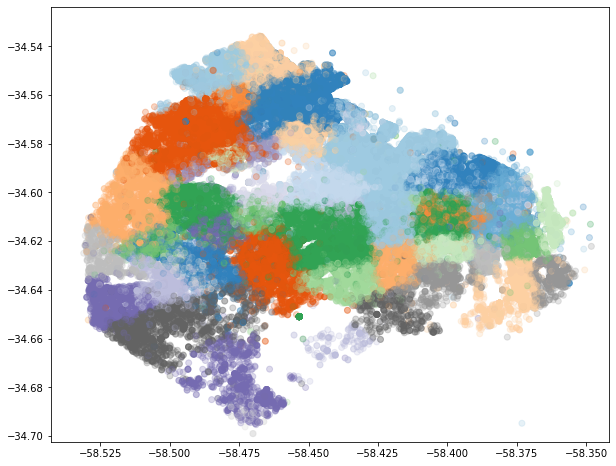

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import count
from collections import defaultdict

c = count()
l3_to_int = defaultdict(lambda : next(c))
l3_int = [l3_to_int[x] for x in df.l3]

plt.figure(figsize=(10,8))
plt.scatter(df.lon, df.lat, c=l3_int, alpha=0.25, cmap='tab20c')
margin = 0.02
plt.ylim(np.percentile(df.lat.dropna(), 1) - 2 * margin, np.percentile(df.lat.dropna(), 99) + margin)
plt.xlim(np.percentile(df.lon.dropna(), 1) - margin, np.percentile(df.lon.dropna(), 99) + margin);

## Precio por metro cuadrado

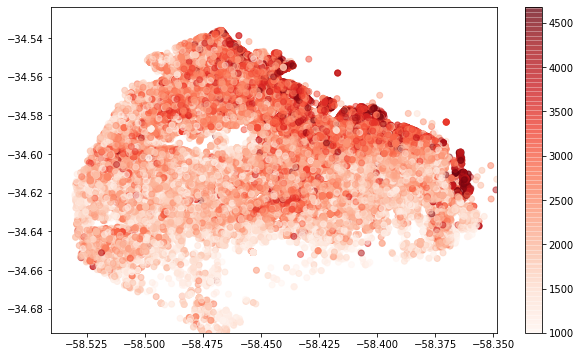

In [13]:
def normal_mask(s):
  return (s>=np.percentile(s, 5)) & (s <=np.percentile(s, 95))

plt.figure(figsize=(10,6))

sdf = df.dropna(subset=['lat', 'lon', 'price', 'surface_total'])
sdf = sdf[normal_mask(sdf.price / sdf.surface_total)]
          
plt.scatter(sdf.lon, sdf.lat, c=sdf.price / sdf.surface_total, alpha=0.5,  cmap='Reds')
margin = 0.02
plt.ylim(np.percentile(sdf.lat.dropna(), 1) - 2 * margin, np.percentile(sdf.lat.dropna(), 99) + margin)
plt.xlim(np.percentile(sdf.lon.dropna(), 1) - margin, np.percentile(sdf.lon.dropna(), 99) + margin)
plt.colorbar();

# Algunas distribuciones

In [14]:
# Solo hay ventas
df.operation_type.value_counts()

Venta    161020
Name: operation_type, dtype: int64

In [15]:
df.columns

Index(['id', 'ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon',
       'l1', 'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'currency', 'price_period', 'title',
       'description', 'property_type', 'operation_type', 'price'],
      dtype='object')

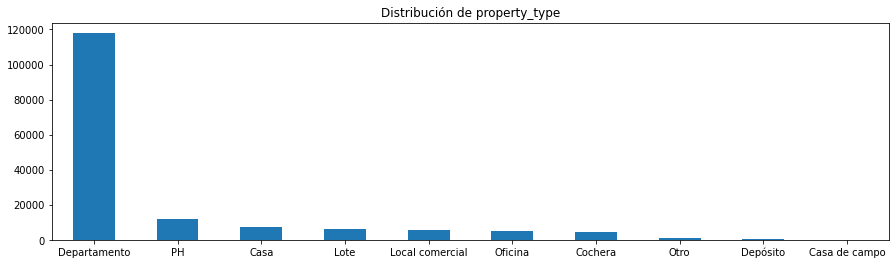

In [16]:
# Que tipo de propiedades

plt.figure(figsize=(15,4))
plt.title('Distribución de property_type')
df.property_type.value_counts().plot.bar()
plt.xticks(rotation=0);

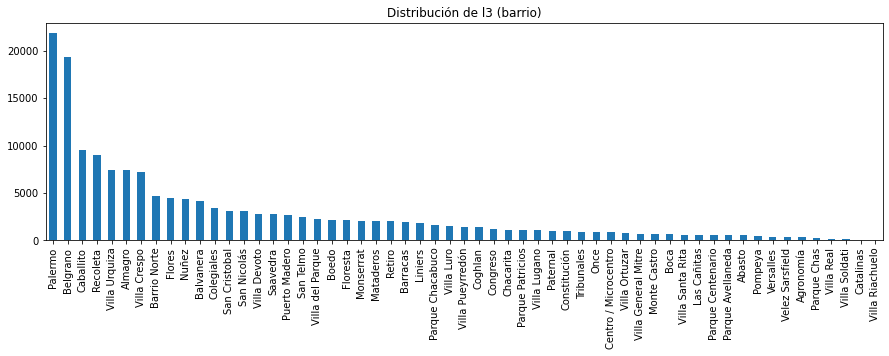

In [17]:
# Que barrios

plt.figure(figsize=(15,4))
plt.title('Distribución de l3 (barrio)')
df.l3.value_counts().plot.bar();

# Precio vs superficie

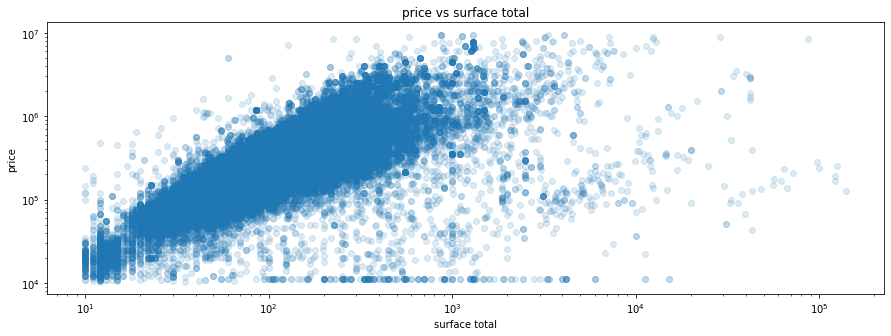

In [20]:
plt.figure(figsize=(15,5))
plt.scatter(df.surface_total, df.price, alpha=0.15)
plt.title('price vs surface total')
plt.xlabel('surface total')
plt.ylabel('price')
plt.xscale('log')
plt.yscale('log')

# Qué otros análisis podes hacer?

## Preparación de datos

De los analisis anteriores podemos concluir que debemos

* Arreglar cuando surface_total < surface_covered (como?, pasa en X_submission?)
* Missing values, hay algunos que tienen un 35% de faltantes (e.g. superficie)

# Feature engineering

Que features vamos a calcular? Usemos la abstracción de los Transformers de scikit-learn

* Precio por metro cuadrado del barrio, numero de habitaciones, baños
* Superficie descubierta
* [TargetEncoding](https://github.com/elsonidoq/ml-practico-2022/blob/main/lib/taller_model_selection/transformers.py#L32) para todos los categoricos
* La inmobiliaria afecta el precio, se puede sacar de la descripcion
* La fecha sirve de algo?
* ...
* ...


A modo ejemplo abajo hay dos: 
* Precio por metro cuadrado de cada barrio
* Extraer la matricula de la inmobiliaria

In [22]:

from importlib import reload
from taller_model_selection import evaluate

reload(evaluate) 
load_train_dev_test = evaluate.load_train_dev_test

In [23]:
from taller_model_selection.evaluate import load_train_dev_test

(X_train, y_train), (X_dev, y_dev), test = load_train_dev_test('/content/gdrive/MyDrive/taller-model-selection-data')

{'pct(train)': 0.8128431250776301, 'pct(dev)': 0.09031797292261831, 'pct(test)': 0.09683890199975158}


# Precio por metro cuadrado del barrio

In [24]:
import numpy as np
from collections import defaultdict
from sklearn.base import BaseEstimator, TransformerMixin

class L3PriceSquaredMeter(BaseEstimator, TransformerMixin):
    """
    Es muy parecida a TargetEncoder
    """

    def __init__(self):
        self.stats_ = None

    def fit(self, X, y):
        # En el fit calculamos los estadísticos por l3 
        # y lo guardamos en self.stats_
        values = defaultdict(list)
        for i, x in enumerate(X):
            if np.isnan(x['surface_total']): continue
            values[x['l3']].append(y[i] / x['surface_total'])

        self.stats_ = {}
        for cat_value, tar_values in values.items():
            tar_values = np.asarray(tar_values)
            self.stats_[cat_value] = [
                np.mean(tar_values), np.std(tar_values),
                np.percentile(tar_values, 90), np.percentile(tar_values, 10)
            ]

        # Siempre hay que devolver self
        return self

    def transform(self, X):
        # En transform usamos los estadísticos
        res = []
        for i, doc in enumerate(X):
            vector = self.stats_[doc['l3']]
            res.append(vector)
        return res

In [25]:
transformer = L3PriceSquaredMeter().fit(X_train, y_train)
trans_X_dev = np.asarray(transformer.transform(X_dev))

In [26]:
from scipy.stats import spearmanr

for i in range(4):
  print(spearmanr(trans_X_dev[:, i], y_dev))

SpearmanrResult(correlation=0.27936165862831697, pvalue=6.356709212216076e-259)
SpearmanrResult(correlation=0.17987731951906988, pvalue=5.1355637335820625e-106)
SpearmanrResult(correlation=0.28120490935906345, pvalue=1.8182343404942603e-262)
SpearmanrResult(correlation=0.26850630139377835, pvalue=1.3287572361920553e-238)


In [27]:
sdf = df.dropna(subset=['surface_total'])
spearmanr(sdf.surface_total, sdf.price)

SpearmanrResult(correlation=0.831847485117046, pvalue=0.0)

Parecieran ser medianamente informativas las features, no tanto como la superficie

# Agregar la inmobiliaria

In [28]:
from collections import defaultdict
import re

class AddCucicba(BaseEstimator, TransformerMixin):
    pat1 = re.compile('(?P<matricula>\d+).{0,10}?cucicba', re.I)
    pat2 = re.compile('cucicba.{0,10}?(?P<matricula>\d+)', re.I)

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # En transform usamos los estadísticos
        res = []
        for i, doc in enumerate(X):
            doc = doc.copy() # para no modificar el input

            match1 = self.pat1.search(doc['description'])
            match2 = self.pat2.search(doc['description'])
            if match1 is None and match2 is None:
                doc['cucicba'] = 'not-found'
            else:
                if match1 is not None: 
                    mat = match1.groupdict()['matricula']
                else:
                    mat = match2.groupdict()['matricula']
                
                doc['cucicba'] = f'mat-{mat}'
            res.append(doc)

        return res

In [29]:
X_train_cucicba = AddCucicba().fit(X_train, y_train).transform(X_train)

In [30]:
df = pd.DataFrame(X_train_cucicba)
df['price'] = y_train

In [31]:
df.cucicba.value_counts().head()

not-found    103267
mat-7437       1375
mat-4330       1071
mat-2340        962
mat-6470        939
Name: cucicba, dtype: int64

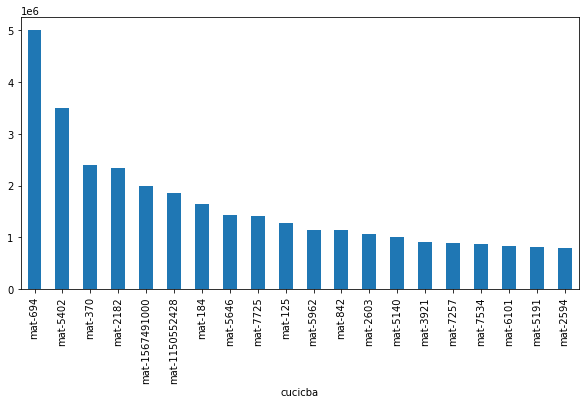

In [32]:
plt.figure(figsize=(10,5))
df.groupby('cucicba').price.mean().sort_values(ascending=False)[:20].plot.bar()

In [33]:
from taller_model_selection.transformers import TargetEncoder
from sklearn.pipeline import make_pipeline

trans_X_dev = (
    make_pipeline(AddCucicba(), TargetEncoder('cucicba')).
    fit(X_train, y_train).
    transform(X_dev)
)

In [34]:
trans_X_dev = np.asarray(trans_X_dev)

In [35]:
from scipy.stats import spearmanr

for i in range(4):
  print(spearmanr(trans_X_dev[:, i], y_dev))

SpearmanrResult(correlation=0.10812437630535367, pvalue=4.4910183817373545e-39)
SpearmanrResult(correlation=0.0700714612783525, pvalue=2.676154001074134e-17)
SpearmanrResult(correlation=0.09859067053650843, pvalue=9.594497571179256e-33)
SpearmanrResult(correlation=0.08815308607840304, pvalue=1.7326357886986853e-26)


Parecen bastante menos informativas, pero tienen informacion